# Challenge 3

In [2]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as sty
import seaborn as sns
%matplotlib inline

#### Import the titanic file. Name your dataset `titanic`.

In [3]:
tt = pd.read_csv('./titanic.csv',low_memory=False)
tt.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


In [162]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Gender         1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### Explore the titanic dataset using Pandas dtypes

In [4]:
#your code here
tt = tt.astype({"Survived": "category", "Pclass": "category", "Gender": "category", "SibSp": "category",
               "Parch": "category", "Embarked": "category", "Age": "int"})
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null category
Pclass         1309 non-null category
Name           1309 non-null object
Gender         1309 non-null category
Age            1309 non-null int64
SibSp          1309 non-null category
Parch          1309 non-null category
Ticket         1309 non-null object
Fare           1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null category
dtypes: category(6), float64(1), int64(2), object(3)
memory usage: 70.3+ KB


#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [5]:
# your code here- numerical variable
tt.select_dtypes("number").head()

,PassengerId,Age,Fare
0,1,22,7.2500
1,2,38,71.2833
2,3,26,7.9250
3,4,35,53.1000
4,5,35,8.0500


In [6]:
#your code here- categorical variable
tt.select_dtypes("category").head()

,Survived,Pclass,Gender,SibSp,Parch,Embarked
0,0.0,3,male,1,0,S
1,1.0,1,female,1,0,C
2,1.0,3,female,0,0,S
3,1.0,1,female,1,0,S
4,0.0,3,male,0,0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

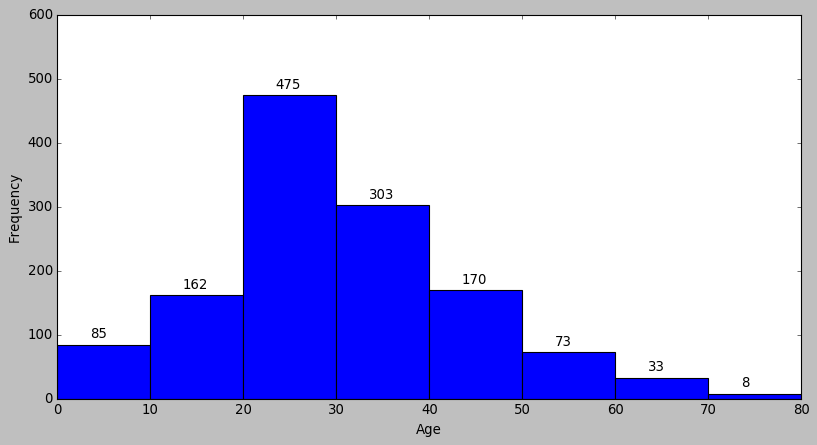

In [45]:
# your code here
sty.use("classic")
fig, ax = plt.subplots(figsize=(12,6))
bins = np.arange(0,90,10)
width = 1
age_hist = ax.hist(tt["Age"], bins=bins, rwidth=width)
ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.set_ylim(0,600)
heights = age_hist[0]
for i in range(len(heights)):
    ax.text(bins[i] + width*3.5, heights[i] + 10, int(heights[i]))

#### Use the appropriate visulalization to show the distribution of the column `Age`

In [191]:
# check chart above

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

/home/nicolas/miniconda3/envs/labs_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


#### Whether the bin size affects your plot? Why?

In [2]:
#your comment here

#### Use seaborn to show the distribution of the column `Age`

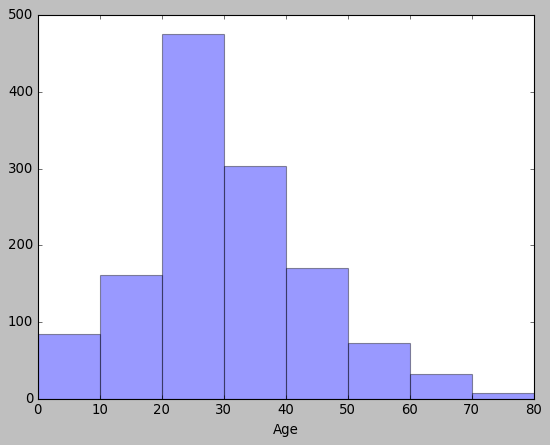

In [231]:
# your code here
sns.distplot(tt["Age"], kde=False, bins=8)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

([<matplotlib.patches.Wedge at 0x7f046e952e50>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939718, 'female')])

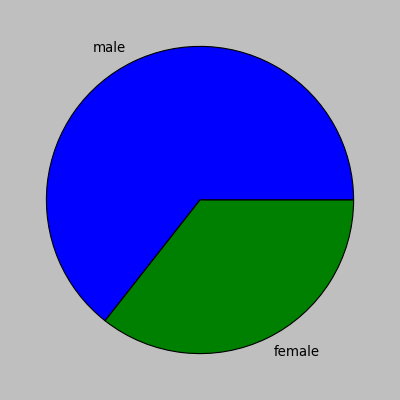

In [243]:
# your code here- 1st way
m = tt.loc[tt["Gender"] == "male"].count()[0]
f = tt.loc[tt["Gender"] == "female"].count()[0]
plt.pie([m,f], labels=["male", "female"])

In [248]:
# your code here- 2nd way


#### Use the appropriate plot to visualize the column `Pclass` 


([<matplotlib.patches.Wedge at 0x7f046e933510>,
 [Text(0.7857105825523255, 0.7698434129518062, 'class 1'),
  Text(-0.6607894097998425, 0.8794073890389915, 'class 2'),
  Text(-0.14346972497658556, -1.0906037034666365, 'class 3')])

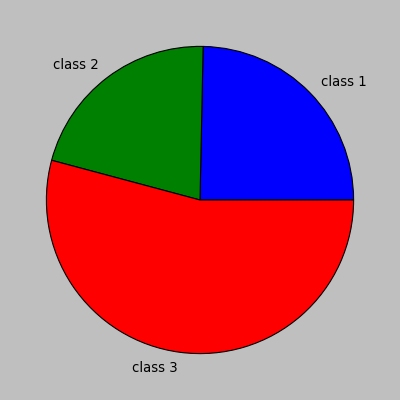

In [251]:
# your code here
c1 = tt.loc[tt["Pclass"] == 1].count()[0]
c2 = tt.loc[tt["Pclass"] == 2].count()[0]
c3 = tt.loc[tt["Pclass"] == 3].count()[0]
plt.pie([c1,c2,c3], labels=["class 1", "class 2", "class 3"])

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [252]:
# your code here
tt["Age"].describe(include="all")

count    1309.000000
mean       29.747135
std        13.469166
min         0.000000
25%        22.000000
50%        28.000000
75%        37.000000
max        80.000000
Name: Age, dtype: float64

#### What does the previous plot tell you about the feature `Age`? Comment.

In [ ]:
# your comment here
# not sure what plot to use here. I can see the mean is around 30, there were babies abord.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

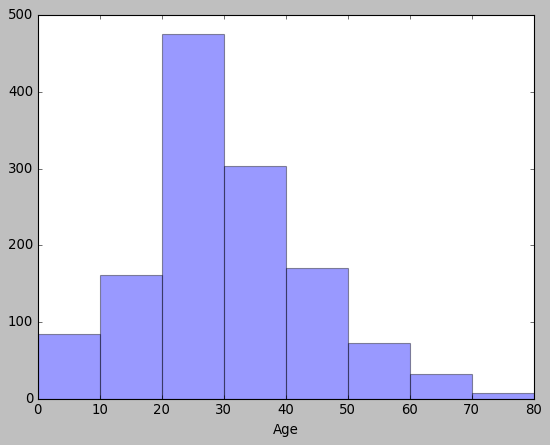

In [253]:
#your code here
sns.distplot(tt["Age"], kde=False, bins=8)

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [ ]:
#your comment here
#same thing

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [46]:
tt.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,U0,S


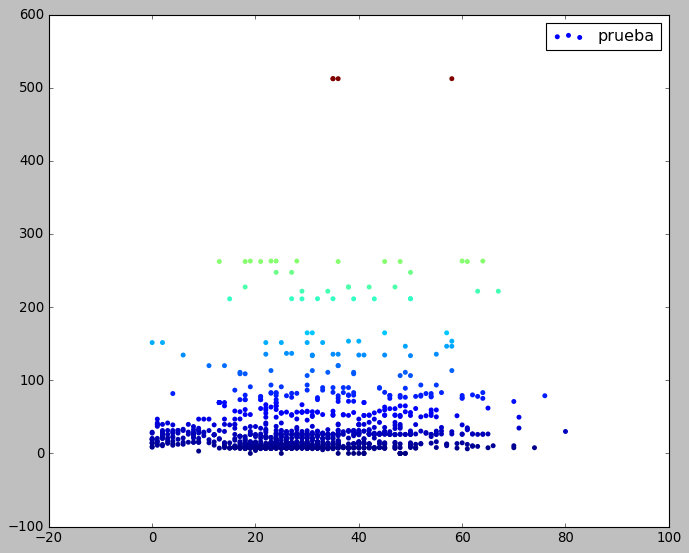

In [62]:
#your code-1st way
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(x=tt["Age"], y=tt["Fare"], c=tt["Fare"], edgecolors="none", label="prueba")
ax.legend()

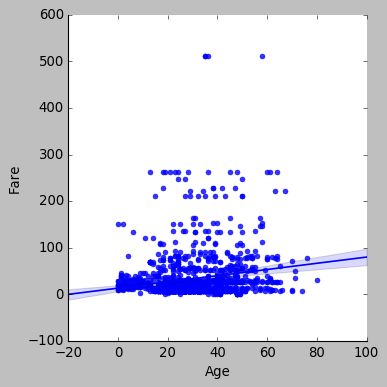

In [53]:
# your code-2nd way
sns.lmplot(x="Age", y="Fare", data=tt)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [55]:
#your code here
ttcorr = tt.corr()
ttcorr

,PassengerId,Age,Fare
PassengerId,1.000000,0.025248,0.031128
Age,0.025248,1.000000,0.173464
Fare,0.031128,0.173464,1.000000


#### According to the previous plot, what are the most correlated feature? Comment.

In [ ]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [ ]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [ ]:
#your code here
